In [53]:
import pandas as pd
import numpy as np
import altair as alt
from altair_saver import save
import matplotlib.pyplot as plt
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [7]:
game_stat = pd.read_csv('data/game_statistics.csv')

In [8]:
game_stat['Team'].unique()

array(['ANA', 'L.A', 'CAR', 'MTL', 'DET', 'OTT', 'TOR', 'COL', 'DAL',
       'FLA', 'NYR', 'N.J', 'T.B', 'NSH', 'CGY', 'PHI', 'EDM', 'S.J',
       'PHX', 'STL', 'PIT', 'CBJ', 'BUF', 'NYI', 'ATL', 'WSH', 'BOS',
       'VAN', 'MIN', 'CHI', 'WPG', 'ARI', 'VGK', 'SEA'], dtype=object)

In [9]:
filtered_game_stat = game_stat[(game_stat['Team'] == 'VAN')& (game_stat['Season']==20212022)&(game_stat['Pos.']!='G')&(game_stat['Pos.']!='F')]
filtered_game_stat['Name'].unique()

array(['Tyler Myers', 'Oliver Ekman-Larsson', 'Kyle Burroughs',
       'Tucker Poolman', 'Jack Rathbone', 'Quinn Hughes', 'Luke Schenn',
       'Brad Hunt', 'Travis Hamonic', 'Madison Bowey', 'Noah Juulsen',
       'Guillaume Brisebois', 'Travis Dermott'], dtype=object)

In [10]:
filtered_game_stat['Date'] = pd.to_datetime(filtered_game_stat['Date'],format = '%d/%m/%Y')

/var/folders/cp/sy05qy250mg99nnwmfjffrwh0000gn/T/ipykernel_2396/4236939613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_game_stat['Date'] = pd.to_datetime(filtered_game_stat['Date'],format = '%d/%m/%Y')


In [11]:
filtered_game_stat = filtered_game_stat.drop(columns = ['Team','Season','Game_ID'])

In [12]:
filtered_game_stat.head(10)

,Date,Is_home,Player_Id,Name,Pos.,Age,Game_No.,TOI_All,TOI_EV,TOI_PP,...,SH_xGF,SH_xGA,SH_SF,SH_SA,SH_FF,SH_FA,SH_CF,SH_CA,PEN_take,PEN_draw
669380,2021-10-13,0,8474574,Tyler Myers,D,31.7,1,1188,1047,45,...,0.0,0.000000,0,0,0,0,0,0,5,7
669382,2021-10-13,0,8475171,Oliver Ekman-Larsson,D,30.2,1,1382,1148,179,...,0.0,0.012839,0,1,0,1,0,1,2,2
669386,2021-10-13,0,8477335,Kyle Burroughs,D,26.3,1,677,653,0,...,0.0,0.000000,0,0,0,0,0,0,0,0
669387,2021-10-13,0,8477359,Tucker Poolman,D,28.3,1,1262,1068,43,...,0.0,0.000000,0,0,0,0,0,0,0,2
669395,2021-10-13,0,8480056,Jack Rathbone,D,22.4,1,759,708,27,...,0.0,0.000000,0,0,0,0,0,0,0,0
669396,2021-10-13,0,8480800,Quinn Hughes,D,22.0,1,1564,1449,115,...,0.0,0.016105,0,1,0,1,0,1,0,0
669839,2021-10-15,0,8474574,Tyler Myers,D,31.7,2,1078,995,0,...,0.0,0.000000,0,0,0,0,0,0,2,2
669841,2021-10-15,0,8475171,Oliver Ekman-Larsson,D,30.2,2,1399,1063,147,...,0.0,0.000000,0,0,0,0,0,0,2,0
669845,2021-10-15,0,8477335,Kyle Burroughs,D,26.3,2,777,706,20,...,0.0,0.000000,0,0,0,0,0,0,0,0
669846,2021-10-15,0,8477359,Tucker Poolman,D,28.4,2,1203,1046,0,...,0.0,0.000000,0,0,0,0,0,0,0,0


In [13]:
filtered_game_stat.columns
# ixG == Total individual expected goals

Index(['Date', 'Is_home', 'Player_Id', 'Name', 'Pos.', 'Age', 'Game_No.',
       'TOI_All', 'TOI_EV', 'TOI_PP', 'TOI_SH', 'EV_G', 'EV_A1', 'EV_A2',
       'EV_ixG', 'EV_GF', 'EV_GA', 'EV_xGF', 'EV_xGA', 'EV_SF', 'EV_SA',
       'EV_FF', 'EV_FA', 'EV_CF', 'EV_CA', 'PP_G', 'PP_A1', 'PP_A2', 'PP_ixG',
       'PP_GF', 'PP_GA', 'PP_xGF', 'PP_xGA', 'PP_SF', 'PP_SA', 'PP_FF',
       'PP_FA', 'PP_CF', 'PP_CA', 'SH_G', 'SH_A1', 'SH_A2', 'SH_ixG', 'SH_GF',
       'SH_GA', 'SH_xGF', 'SH_xGA', 'SH_SF', 'SH_SA', 'SH_FF', 'SH_FA',
       'SH_CF', 'SH_CA', 'PEN_take', 'PEN_draw'],
      dtype='object')

https://evolving-hockey.com/glossary/standard-skater-tables/

In [14]:
filtered_game_stat.shape

(496, 55)

In [54]:
van_d_home_vs_away = alt.Chart(filtered_game_stat).mark_bar().encode(
    x = 'Name',
    y = ('sum(EV_xGF)'),
    color = 'Name',
    tooltip = 'Name'
).facet('Is_home')

van_d_home_vs_away

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [20]:
filtered_game_stat['EV_GF'].unique()

array([0, 1, 2, 3])

<AxesSubplot:xlabel='Date'>

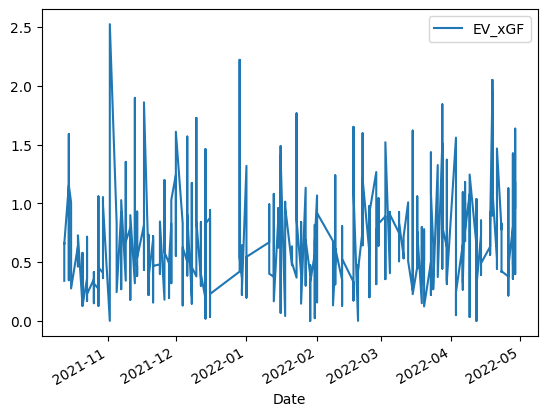

In [52]:
filtered_game_stat.plot(kind = 'line', x = 'Date', y = 'EV_xGF', secondary_y = 'EV_xGA')